# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Common Imports

In [13]:
import numpy as np
import os
import time
import sys
import time
import scipy
import json
import matplotlib.pyplot as plt


## Define Convenience Function to rotate an image by an arbitrary angle

In [2]:
from scipy.ndimage import rotate

def rotateImage(image):
    randomRotationAngle = random.randint(0, 360)
    rotated_image = rotate(image, randomRotationAngle, reshape=False)
    return rotated_image

## Define Convenience Function to visualize samples of an image data array

In [15]:

%matplotlib inline

def visualizeSamplesFromData(dataArray):
    for index in range(0, 10):
        image = dataArray[index]
        squeezedImage = image.squeeze()
        plt.figure(figsize=(3,3))
        plt.imshow(squeezedImage) 
        

## Define Convenience Function to store data as JSON file for later analysis

In [4]:
import json

const_data_analysis_folder = 'data_for_analysis'

def saveDataToDiskAsJson(data):
    if not os.path.exists(const_data_analysis_folder):
        os.makedirs(const_data_analysis_folder)
    currentTime = time.time()
    filename = const_data_analysis_folder + '/' + str(currentTime)
    print(filename)
    with open(filename, 'w') as outfile:
        json.dump(data, outfile)
        
def getDataFromDisk(filename):
    filename = const_data_analysis_folder + '/' + filename
    with open(filename) as infile:
        data = json.load(infile)

## Define Convenience Function to store data as pickle file for later analysis

In [36]:
# Sample to write Data as Pickle File and read it back

import pickle

data_to_test_pickle = {1,2,3,4,5}

const_pickle_data_analysis_folder = 'pickle_data_for_analysis'

def saveDataToDiskAsPickle(data, param_filename = None):
    if not os.path.exists(const_pickle_data_analysis_folder):
        os.makedirs(const_pickle_data_analysis_folder)

    fileName = param_filename
    
    if not fileName:
        filename = str(time.time())
    
    filename = const_pickle_data_analysis_folder + '/' + param_filename + '.pickle'
    
    debugLog("Data writing started : " + filename)

    with open(filename, 'wb') as handle:
        pickle.dump(data, handle, pickle.HIGHEST_PROTOCOL) 
    
    debugLog("Data writing complete : " + filename)

        
def getDataFromPickleFile(filename):
    returnData = None
    filename = const_pickle_data_analysis_folder + '/' + filename + '.pickle'
    debugLog("Data loading started : " + filename)
    with open(filename, 'rb') as handle:
        returnData = pickle.load(handle)
    debugLog("Data loading complete : " + filename)
    return returnData
        
saveDataToDiskAsPickle(data_to_test_pickle, 'apple')
print(getDataFromPickleFile("apple"))


Data writing started : pickle_data_for_analysis/apple.pickle

Data writing complete : pickle_data_for_analysis/apple.pickle

Data loading started : pickle_data_for_analysis/apple.pickle

Data loading complete : pickle_data_for_analysis/apple.pickle
{1, 2, 3, 4, 5}


## Define Convenience Function to make sound

In [6]:

# This can be used to indicate the completion of training for example
def makeSound():
    os.system("printf '\a'") # or '\7'
    

## Define Convenience Logging Functions

In [7]:
const_info_log_enabled = False
def infoLog(logMessage):
    if const_info_log_enabled == True:
        print("")
        print(logMessage)

const_debug_log_enabled = True
def debugLog(logMessage):
    if const_debug_log_enabled == True:
        print("")
        print(logMessage)
        
const_warning_log_enabled = True
def warningLog(logMessage):
    if const_warning_log_enabled == True:
        print("")
        print(logMessage)
        
const_error_log_enabled = True
def errorLog(logMessage):
    if const_error_log_enabled == True:
        print("")
        print(logMessage)

## Convenience method - to show progress

In [8]:
# Used From - http://stackoverflow.com/questions/3173320/text-progress-bar-in-the-console

def progressIndicator(count, total, suffix=''):
    bar_len = 60
    filled_len = int(round(bar_len * count / float(total)))

    percents = round(100.0 * count / float(total), 1)
    bar = '=' * filled_len + '-' * (bar_len - filled_len)

    sys.stdout.write('[%s] %s%s ...%s\r' % (bar, percents, '%', suffix))
    sys.stdout.flush()  

---
## Step 0: Load The Data

### Load Preprocessed ( normalized ) training data to disk for future runs

In [76]:
X_train = getDataFromPickleFile('X_train_normalized')
y_train = getDataFromPickleFile('y_train_normalized')


Data loading started : pickle_data_for_analysis/X_train_normalized.pickle

Data loading complete : pickle_data_for_analysis/X_train_normalized.pickle

Data loading started : pickle_data_for_analysis/y_train_normalized.pickle

Data loading complete : pickle_data_for_analysis/y_train_normalized.pickle


### Visualize the loaded data

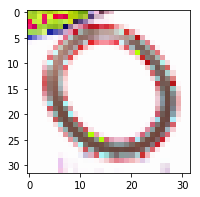

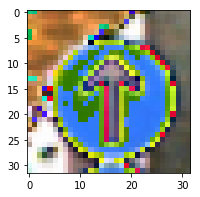

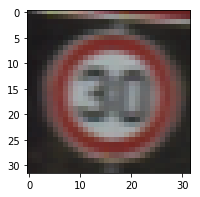

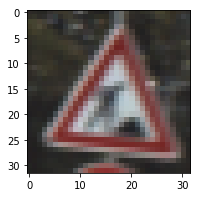

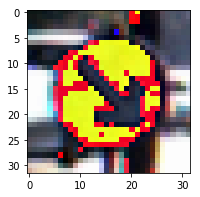

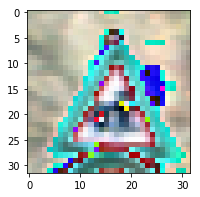

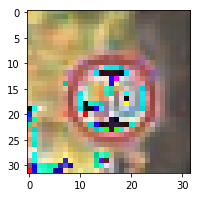

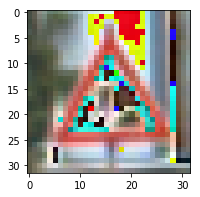

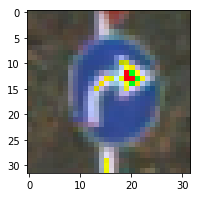

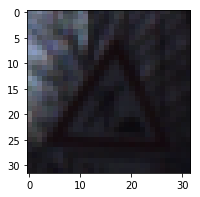

In [77]:
visualizeSamplesFromData(X_train)

In [18]:
# Load pickled data
import pickle
import numpy

# TODO: Fill this in based on where you saved the training and testing data

# training_file = 'traffic-signs-data/train.p'
validation_file = 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

# with open(training_file, mode='rb') as f:
#     train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
# X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# JL - explore the data keys
# infoLog("Training Data Keys : " + str(train.keys()))
infoLog("Validation Data Keys : " + str(valid.keys()))
infoLog("Test Data Keys : " + str(test.keys()))

# JL - explore data shape
X_train_shape = X_train.shape
y_train_shape = y_train.shape
X_valid_shape = X_valid.shape
y_valid_shape = y_valid.shape
X_test_shape = X_test.shape
y_test_shape = y_test.shape

infoLog("Shape of X_train : " + str(X_train_shape))
infoLog("Shape of y_train : " + str(y_train_shape))
infoLog("Shape of X_valid : " + str(X_valid_shape))
infoLog("Shape of y_valid : " + str(y_valid_shape))
infoLog("Shape of X_test : " + str(X_test_shape))
infoLog("Shape of y_test : " + str(y_test_shape))

# JL - explore unique data labels
combined_labels_array = numpy.concatenate((y_train,y_valid,y_test))
num_of_unique_labels_in_all_data = len(numpy.unique(combined_labels_array))
infoLog("Total Number of Unique Labels: " + str(num_of_unique_labels_in_all_data))


# JL - explore shape of one image
X_train_zero_shape = X_train[0].shape
infoLog("Shape of X_train[0] : " + str(X_train_zero_shape))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [19]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train_shape[0]

# TODO: Number of validation examples
n_validation = X_valid_shape[0]

# TODO: Number of testing examples.
n_test = X_test_shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (X_test_shape[1],X_test_shape[2])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = num_of_unique_labels_in_all_data

infoLog("Number of training examples =" + str(n_train))
infoLog("Number of testing examples =" + str(n_test))
infoLog("Image data shape =" + str(image_shape))
infoLog("Number of classes =" + str(n_classes))

### Convenience Mapper to convert a classId to Sign Name

In [20]:
# JL - Convenience Mapper

classIdSignNameDict = {0:"Speed limit (20km/h)",
1:"Speed limit (30km/h)",
2:"Speed limit (50km/h)",
3:"Speed limit (60km/h)",
4:"Speed limit (70km/h)",
5:"Speed limit (80km/h)",
6:"End of speed limit (80km/h)",
7:"Speed limit (100km/h)",
8:"Speed limit (120km/h)",
9:"No passing",
10:"No passing for vehicles over 3.5 metric tons",
11:"Right-of-way at the next intersection",
12:"Priority road",
13:"Yield",
14:"Stop",
15:"No vehicles",
16:"Vehicles over 3.5 metric tons prohibited",
17:"No entry",
18:"General caution",
19:"Dangerous curve to the left",
20:"Dangerous curve to the right",
21:"Double curve",
22:"Bumpy road",
23:"Slippery road",
24:"Road narrows on the right",
25:"Road work",
26:"Traffic signals",
27:"Pedestrians",
28:"Children crossing",
29:"Bicycles crossing",
30:"Beware of ice/snow",
31:"Wild animals crossing",
32:"End of all speed and passing limits",
33:"Turn right ahead",
34:"Turn left ahead",
35:"Ahead only",
36:"Go straight or right",
37:"Go straight or left",
38:"Keep right",
39:"Keep left",
40:"Roundabout mandatory",
41:"End of no passing",
42:"End of no passing by vehicles over 3.5 metric tons"}

def getSignNameForClassId(classId):
    return classIdSignNameDict[classId]

infoLog(getSignNameForClassId(0))

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?


Speed limit (70km/h)

Wild animals crossing


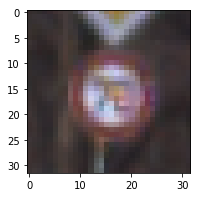

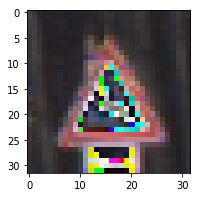

In [21]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

for counter in range(0,2):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    plt.figure(figsize=(3,3))
    plt.imshow(image)
    debugLog(getSignNameForClassId(y_train[index]))


In [ ]:
# JL - Visualization continued

for counter in range(0,2):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    plt.figure(figsize=(3,3))
    plt.imshow(image)
    infoLog(getSignNameForClassId(y_train[index]))

In [ ]:
# JL - Visualization continued

for counter in range(0,2):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    plt.figure(figsize=(3,3))
    plt.imshow(image)
    infoLog(getSignNameForClassId(y_train[index]))

In [ ]:
# JL - Visualization continued

for counter in range(0,2):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    plt.figure(figsize=(3,3))
    plt.imshow(image)
    infoLog(getSignNameForClassId(y_train[index]))

In [ ]:
# JL - Visualization continued

for counter in range(0,2):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    plt.figure(figsize=(3,3))
    plt.imshow(image)
    infoLog(getSignNameForClassId(y_train[index]))

In [ ]:
# JL - Visualization continued

for counter in range(0,2):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    plt.figure(figsize=(3,3))
    plt.imshow(image)
    infoLog(getSignNameForClassId(y_train[index]))

In [ ]:
# JL - Visualization continued

for counter in range(0,2):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    plt.figure(figsize=(3,3))
    plt.imshow(image)
    infoLog(getSignNameForClassId(y_train[index]))

In [ ]:
# JL - Visualization continued

for counter in range(0,3):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    plt.figure(figsize=(3,3))
    plt.imshow(image)
    infoLog(getSignNameForClassId(y_train[index]))

### Explore distribution of number of training labels for various classes

Our goal here is to determine which classes are more heavily represented in the training data, and to then increased the representation for under represented classes so that the model gets proper training on all types of classifier(s)


function: generate_class_distribution

Labels Dictionary : {0: 180, 1: 1980, 2: 2010, 3: 1260, 4: 1770, 5: 1650, 6: 360, 7: 1290, 8: 1260, 9: 1320, 10: 1800, 11: 1170, 12: 1890, 13: 1920, 14: 690, 15: 540, 16: 360, 17: 990, 18: 1080, 19: 180, 20: 300, 21: 270, 22: 330, 23: 450, 24: 240, 25: 1350, 26: 540, 27: 210, 28: 480, 29: 240, 30: 390, 31: 690, 32: 210, 33: 599, 34: 360, 35: 1080, 36: 330, 37: 180, 38: 1860, 39: 270, 40: 300, 41: 210, 42: 210}

Mean :809

Standard Deviation :619.420183705

Max :2010


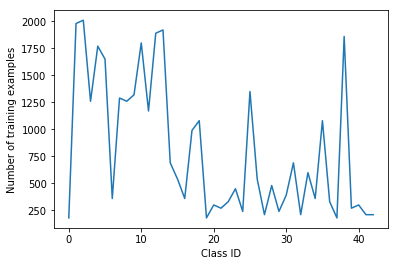

In [78]:
# Generate and visualize statistics regarding distribution of Class Labels and Instances for training data

import numpy as np
import matplotlib.pyplot as plt

def generate_class_distribution(classArray):
    classIds, countsForClassIds = np.unique(y_train, return_counts=True)
    labels_count_dictionary = dict(zip(classIds, countsForClassIds))
    mean_number_of_samples_per_class_list_training_data = int(np.mean(countsForClassIds))
    standard_deviation_number_of_samples_per_class_list_training_data = np.std(countsForClassIds)
    max_number_of_samples_per_class_list_training_data = int(np.max(countsForClassIds))
    
    debugLog("function: generate_class_distribution")
    debugLog("Labels Dictionary : " + str(labels_count_dictionary))
    debugLog("Mean :" + str(mean_number_of_samples_per_class_list_training_data))
    debugLog("Standard Deviation :" + str(standard_deviation_number_of_samples_per_class_list_training_data))
    debugLog("Max :" + str(max_number_of_samples_per_class_list_training_data))
    
    return labels_count_dictionary, mean_number_of_samples_per_class_list_training_data,standard_deviation_number_of_samples_per_class_list_training_data,max_number_of_samples_per_class_list_training_data

def visualize_class_distribution(labels_count_dictionary):
    classIdlist_training_data = list(labels_count_dictionary.keys())
    number_of_samples_per_class_list_training_data = list(labels_count_dictionary.values())
    plt.plot(classIdlist_training_data,number_of_samples_per_class_list_training_data)
    plt.ylabel('Number of training examples')
    plt.xlabel('Class ID')
    plt.show()

labels_count_dictionary, mean_number_of_samples_per_class_list_training_data, standard_deviation_number_of_samples_per_class_list_training_data, max_number_of_samples_per_class_list_training_data = generate_class_distribution(y_train)

visualize_class_distribution(labels_count_dictionary)

In [23]:
# Separate into under-represented and over-represented classes by calculating mean

training_data_under_represented_classes_dict = dict()
training_data_over_represented_classes_dict = dict()

for class_id, number_of_samples in labels_count_dictionary.items():
    # Evaluate how big is the difference of the number of features for a class from the mean, relative to itself
    # boost_ratio = number of times number_of_samples has to be 'added' to itself to equal 'max_number_of_samples_per_class_list_training_data'
    # We do not want to reject any data, so we will not reject any features for now
    ratio = (mean_number_of_samples_per_class_list_training_data - number_of_samples) / number_of_samples
    if ratio >= 0:
        boost_ratio = int(ratio)
        training_data_under_represented_classes_dict[class_id] = boost_ratio
    else:
        training_data_over_represented_classes_dict[class_id] =  ratio
        
debugLog("Classes with under representation in training samples : " + str(training_data_under_represented_classes_dict))
debugLog("Classes with over representation in training samples : " + str(training_data_over_represented_classes_dict))

def is_class_underrepresented(classId):
    boost_ratio = training_data_under_represented_classes_dict.get(classId, None)
    if boost_ratio:
        return boost_ratio
    else:
        return False
    
def is_class_overrepresented(classId):
    ratio = training_data_over_represented_classes_dict.get(classId, None)
    if ratio:
        return ratio
    else:
        return False
    
infoLog("Is class with Class ID : 31 under represented : " + str(is_class_underrepresented(31)))
infoLog("Is class with Class ID : 1 over represented : " + str(is_class_overrepresented(1)))



Classes with under representation in training samples : {0: 3, 6: 1, 14: 0, 15: 0, 16: 1, 19: 3, 20: 1, 21: 1, 22: 1, 23: 0, 24: 2, 26: 0, 27: 2, 28: 0, 29: 2, 30: 1, 31: 0, 32: 2, 33: 0, 34: 1, 36: 1, 37: 3, 39: 1, 40: 1, 41: 2, 42: 2}

Classes with over representation in training samples : {1: -0.59141414141414139, 2: -0.59751243781094532, 3: -0.35793650793650794, 4: -0.54293785310734466, 5: -0.50969696969696965, 38: -0.56505376344086022, 7: -0.37286821705426354, 8: -0.35793650793650794, 9: -0.38712121212121214, 10: -0.55055555555555558, 11: -0.30854700854700856, 12: -0.571957671957672, 13: -0.5786458333333333, 17: -0.18282828282828284, 18: -0.25092592592592594, 35: -0.25092592592592594, 25: -0.40074074074074073}


In [31]:
# Iterate over training feature and label set and do a trivial 'Boost' of under-represented features and 'Reject' of over-represented features

debugLog("Started - Boosting and Rejection ")

training_data_boosted_labels_list = list()
training_data_boosted_features_list = list()

training_data_deboosted_index_list = list()

new_X_train = list()
new_y_train = list()

number_of_labels = len(y_train)

for index, class_id in enumerate(y_train):
    boost_ratio_underrepresented = is_class_underrepresented(class_id)
    boost_ratio_overrepresented = is_class_overrepresented(class_id)

    if boost_ratio_underrepresented:
        # Add original image and feature
        new_X_train.append(X_train[index])
        new_y_train.append(class_id)
        
        # Add boosted image and feature
        new_X_train.append(rotateImage(X_train[index]))
        new_y_train.append(class_id)
    
    elif boost_ratio_overrepresented and boost_ratio_overrepresented < -0.3:
        randomValue = random.randint(0, 1)
        # Add about 50% of the heavily represented features
        if randomValue == 0:
            new_X_train.append(X_train[index])
            new_y_train.append(class_id)
            
    elif boost_ratio_overrepresented and boost_ratio_overrepresented >= -0.3:
        # Add about 66% of the less heavily represented features
        randomValue = random.randint(0, 2)
        if randomValue == 0 or randomValue == 1:
            new_X_train.append(X_train[index])
            new_y_train.append(class_id)

    progressIndicator(index,number_of_labels)

infoLog(" ")
infoLog("Number of elements in :  new_X_train = " + str(len(new_X_train)))
infoLog("Number of elements in :  new_y_train = " + str(len(new_y_train)))

debugLog("Ended - Boosting and Rejection ")



Started - Boosting and Rejection 
[============================================================] 100.0% ...
Ended - Boosting and Rejection 


In [32]:
# Set the features and labels from boosted and rejected to the main training data
X_train = new_X_train
y_train = new_y_train


function: generate_class_distribution

Labels Dictionary : {0: 360, 1: 1012, 2: 1012, 3: 621, 4: 885, 5: 796, 6: 720, 7: 660, 8: 586, 9: 674, 10: 923, 11: 586, 12: 1006, 13: 966, 16: 720, 17: 636, 18: 711, 19: 360, 20: 600, 21: 540, 22: 660, 24: 480, 25: 676, 27: 420, 29: 480, 30: 780, 32: 420, 34: 720, 35: 720, 36: 660, 37: 360, 38: 944, 39: 540, 40: 600, 41: 420, 42: 420}

Mean :657

Standard Deviation :191.920307214

Max :1012
{0: 360, 1: 1012, 2: 1012, 3: 621, 4: 885, 5: 796, 6: 720, 7: 660, 8: 586, 9: 674, 10: 923, 11: 586, 12: 1006, 13: 966, 16: 720, 17: 636, 18: 711, 19: 360, 20: 600, 21: 540, 22: 660, 24: 480, 25: 676, 27: 420, 29: 480, 30: 780, 32: 420, 34: 720, 35: 720, 36: 660, 37: 360, 38: 944, 39: 540, 40: 600, 41: 420, 42: 420}
657
191.920307214
1012


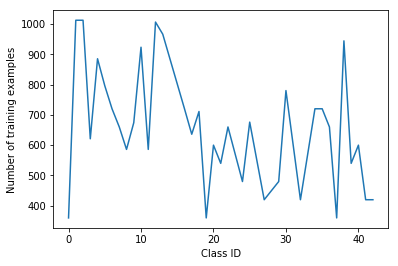

In [33]:
labels_count_dictionary, mean, standard_deviation,maxvalue = generate_class_distribution(y_train)
print(labels_count_dictionary)
print(mean)
print(standard_deviation)
print(maxvalue)

visualize_class_distribution(labels_count_dictionary)

In [37]:
saveDataToDiskAsPickle(X_train, 'X_train_normalized_boosted')
saveDataToDiskAsPickle(y_train, 'y_train_normalized_boosted')


Data writing started : pickle_data_for_analysis/X_train_normalized_boosted.pickle

Data writing complete : pickle_data_for_analysis/X_train_normalized_boosted.pickle

Data writing started : pickle_data_for_analysis/y_train_normalized_boosted.pickle

Data writing complete : pickle_data_for_analysis/y_train_normalized_boosted.pickle


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [79]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# JL - TBD - For the images for which we have less training data, we should focus on generating as much fake data as possible
# so that eventually, for all the class(es) we have the same number of training images

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### JL - Preprocessing -  Normalization

In [ ]:
# JL - Take a random image and normalize it

import numpy as np
import copy

const_for_pixel_normalization = 128.0

# Given an image, creates a copy of the same, and then performs normalization on it and returns it
def normalize_image(image):
    image = image.astype(np.float32)
    return_image = copy.copy(image)
    for index,pixel in np.ndenumerate(return_image):
        infoLog("Pixel Intensity Before Normalization : " + str(pixel))
        pixel = (pixel-const_for_pixel_normalization) / const_for_pixel_normalization
        infoLog("Pixel Intensity After Normalization : " + str(pixel))
        return_image[index] = pixel
    return return_image

index = random.randint(0, len(X_train))

random_image = X_train[index]
squeezedImage = random_image.squeeze()
plt.figure(figsize=(3,3))
plt.imshow(squeezedImage)

normalized_image = normalize_image(random_image)
squeezedNormalizedImage = normalized_image.squeeze()
plt.figure(figsize=(3,3))
plt.imshow(squeezedNormalizedImage)

debugLog("Sign Name : " + getSignNameForClassId(y_train[index]))

### Run Normalization Preprocessing over the training data

In [ ]:
#JL - Create a copy of the training data, so that we have access to the original

num_training_samples = len(X_train)

X_train = X_train.astype(np.float32)
debugLog("X_train data type : " + str(X_train.dtype))

debugLog("START -- Preprocessing step - normalization - for all training images - Count : " + str(num_training_samples))
start_preprocessing_normalization_time = time.time()

for index in range(0, num_training_samples):
    image = X_train[index]
    normalizedImage = normalize_image(image)
    X_train[index] = normalizedImage
    progressIndicator(index,num_training_samples)

end_preprocessing_normalization_time = time.time() 
timediff_preprocessing_normalization_time = end_preprocessing_normalization_time - start_preprocessing_normalization_time
debugLog("END -- Preprocessing step - normalization - for all training images in : " + str(timediff_preprocessing_normalization_time) + " seconds")


In [ ]:
# Visualize the data after normalization
for index in range(0, 10):
    image = X_train[index]
    squeezedImage = image.squeeze()
    plt.figure(figsize=(3,3))
    plt.imshow(squeezedImage) 

### Save Preprocessed ( normalized ) and generated training data to disk for future runs

In [ ]:
# Getting memory error
saveDataToDiskAsPickle(X_train, 'X_train_normalized')
saveDataToDiskAsPickle(y_train, 'y_train_normalized')

### HyperParameters / Tunable Parameter(s)

In [119]:

# Immediate Next :
# * Increase CNN layers to say 5, using smaller filters and then run this for 30 epochs to compare accuracy, relative to the previous architecture.
# * In progress - Within Side Experiments, Understand how model ( and variable ) save / restore works, by using a really small training / validation data set repeatedly across multiple sessions. Then apply it here to continue training. 
# * Examine which features from the validation set are not being predicted properly by the model.
# * Regularization like L2.
# * Manufacture fake data for under represented classes and store them in local files for later use.
# * Done - Save model only if it's accuracy increases. 
# * Is this needed - While saving a model_append it's accuracy to the model name.
# * Know how to do this, need to implement for fake data manufacturing - Check how to de-boost features. 
# Pending - Different types of Optimizer(s) - Adam, SGD, AdaGrad, Momentum
# * Done - both are fairly similar - In side experiments folder examine the distribution of training data samples versus validation data sample distribution
# * Done - current stat - 94.5% accuracy with 30 iterations. Try with 50 iterations. 

# --

# Done - Epochs
# Done - Batch Size
# Partly done, do more if needed - More complex / better architectures - added one more conv layer, increased filter depth
# Done - Statistical analysis of which classes are heavily represented in training versus validation data, and at a minimum represent all classes equivalently within training data
# Done - From the above analysis, prepare a listing of under represented classes
# Done - Data Augmentation via Image rotation for under represented classes
# Done - Improved pre-processing like 0 mean, 1 standard deviation or other techniques
# Pending - Data Augmentation via Image translation for under represented classes
# Pending - Data Augmentation via Any other image manipulation for under represented classes
# Pending - Data Augmentation via GreyScaling for under represented classes
# In Progress - Regularization like Drop Out
# Pending - Hyper parameter tuning - learning rate
# Pending - You can use the concept of a Checkpoint to store / resume a training session
# Pending - You can use the concept of a Summary writer to save training summaries for a session
# Pending - Regularization like L2
# Pending - Different Activation functions
# Pending - You have been give the feature co ordinates within the image, so that you can take those co ordinates, and move them within the image !
# Pending - Implement Learning Rate Decay if accuracy does not improve over x-iterations
# Pending - If the Learning Rate improves, then Save the model to the Disk, so that it can be easily restored / tested at any time. This can be done by saving and restoring 'Checkpoint' files.
# Pending - Review ConvNetJS to check out how they implement various Data Visualizations in real time and see if you can incorporate those.
# For example using ConvNetJS, initiate a conv net training process, and see how the visualizations update in real time.
# Pending - Performance against test data ( after 94% accuracy on validation set )
# Pending - Performance against previously unseen images.
# Pending - Extra credits
# Pending - Write-up

param_epochs = 1
param_batchsize = 128
param_mean = 0
param_standard_deviation = 0.1
param_learning_rate = 0.001
param_activation_function = 'ReLU'
param_pooling_function = 'Max'
param_architecture_updates = '1. Incresed Filter Depths 2. Increased Size of fully connected layers 3. Added a convolution layer.' 
param_preprocessing_updates = '1. Implemented Normalization '
param_data_augmentation_updates = ' '
# param_data_augmentation_updates = '1. Implemented boosting of under represented classes and rejection of under represented classes.'


### Model Architecture

In [108]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [109]:
import tensorflow as tf

S = param_epochs
BATCH_SIZE = param_batchsize
mu = param_mean
sigma = param_standard_deviation
const_initial_learning_rate = param_learning_rate

In [110]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

In [123]:
from tensorflow.contrib.layers import flatten
    
# Jai - Helper methods
def maxpool2d(x, poolingsize=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, poolingsize, poolingsize, 1],
        strides=[1, poolingsize, poolingsize, 1],
        padding='VALID')
      
def conv2d_with_pooling(x, W, b, convstride=1, poolingsize=2):
        x = tf.nn.conv2d(x, W, strides=[1, convstride, convstride, 1], padding='VALID')
        x = tf.nn.bias_add(x, b)
        x = tf.nn.relu(x)
        x = maxpool2d(x)
        return x
    
def conv2d(x, W, b, convstride=1):
        x = tf.nn.conv2d(x, W, strides=[1, convstride, convstride, 1], padding='VALID')
        x = tf.nn.bias_add(x, b)
        x = tf.nn.relu(x)
        return x
    
# Jai - Define Weights based on calculations below
weights = {
    'wconv1': tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 16), mean=mu, stddev = sigma), name='wconv1'),
    'wconv2': tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 32), mean=mu, stddev = sigma), name='wconv2'),
    'wconv3': tf.Variable(tf.truncated_normal(shape=(2, 2, 32, 256), mean=mu, stddev = sigma), name='wconv3'),
    'wconv4': tf.Variable(tf.truncated_normal(shape=(1, 1, 256, 300), mean=mu, stddev = sigma), name='wconv4'),
    'wfc1': tf.Variable(tf.truncated_normal(shape=(300,240), mean=mu, stddev = sigma), name='wfc1'),
    'wfc2': tf.Variable(tf.truncated_normal(shape=(240,168), mean=mu, stddev = sigma), name='wfc2'),
    'woutput': tf.Variable(tf.truncated_normal(shape=(168,43), mean=mu, stddev = sigma), name='woutput')}
    
# Jai - Define Biases based on calculations below
biases = {
    'bconv1': tf.Variable(tf.zeros([16]), name='bconv1'),
    'bconv2': tf.Variable(tf.zeros([32]), name='bconv2'),
    'bconv3': tf.Variable(tf.zeros([256]), name='bconv3'),
    'bconv4': tf.Variable(tf.zeros([300]), name='bconv4'),
    'bfc1': tf.Variable(tf.zeros([240]), name='bfc1'),
    'bfc2': tf.Variable(tf.zeros([168]), name='bfc2'),
    'boutput': tf.Variable(tf.zeros([43]), name='boutput')
    }

def LeNet(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output w/Pooling = 14x14x16.
    convlayer1 = conv2d_with_pooling(x,weights['wconv1'],biases['bconv1'],1,2)
    debugLog(convlayer1.get_shape())
    
    # TODO: Layer 2: Convolutional. Output w/Pooling = 5x5x32.
    convlayer2 = conv2d_with_pooling(convlayer1,weights['wconv2'],biases['bconv2'],1,2)
    debugLog(convlayer2.get_shape())
    
    # TODO: Layer 3: Convolutional. Output w/Pooling = 2x2x256.
    convlayer3 = conv2d_with_pooling(convlayer2,weights['wconv3'],biases['bconv3'],1,2)
    debugLog(convlayer3.get_shape())
    
    # TODO: Layer 4: Convolutional. Output = 1x1x300.
    convlayer4 = conv2d_with_pooling(convlayer3,weights['wconv4'],biases['bconv4'],1,2)
    debugLog(convlayer4.get_shape())

    # TODO: Flatten. Input = 1x1x300. Output = 300.
    flattened_convlayer4 = tf.contrib.layers.flatten(convlayer4)   
    debugLog(flattened_convlayer4.get_shape())
    
    # TODO: Layer 3: Fully Connected. Input = 300. Output = 240.
    fc1 = tf.add(tf.matmul(flattened_convlayer4,weights['wfc1']),biases['bfc1'])
    
    # TODO: Activation.
    fc1_activated = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 240. Output = 168.
    fc2 = tf.add(tf.matmul(fc1_activated,weights['wfc2']),biases['bfc2'])
    
    # TODO: Activation.
    fc2_activated = tf.nn.relu(fc2)
    
    # Added a drop out layer
    fc2_after_dropout = tf.nn.dropout(fc2_activated, keep_prob)

    # TODO: Layer 5: Fully Connected. Input = 168. Output = 43.
    logits = tf.add(tf.matmul(fc2_after_dropout,weights['woutput']),biases['boutput'])
    
    return logits

In [ ]:
rate = const_initial_learning_rate

logits = LeNet(x,keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation

In [113]:
# Model evaluation

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [114]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    tf.reset_default_graph()
    tf.add_to_collection('vars', weights['wconv1'])
    
    num_examples = len(X_train)
    
    debugLog("START -- Training and Validation ...")
    debugLog("")
    
    start_overall_time = time.time()
    validation_accuracy = None
    highest_validation_accuracy = None
    validation_accuracy_list = list()
    
    for i in range(S):
        X_train, y_train = shuffle(X_train, y_train)
        start_training_time = time.time()
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.7})
            progressIndicator(end,num_examples)
        end_training_time = time.time()
        training_execution_time = end_training_time - start_training_time
        debugLog("")
        debugLog("Epoch : " + str(i) + " Training time : " + str(training_execution_time) )
  
        debugLog("")
        start_valdidation_time = time.time()
        validation_accuracy = evaluate(X_valid, y_valid)
        validation_accuracy_list.append(validation_accuracy)
        end_valdidation_time = time.time()
        validation_execution_time = end_valdidation_time - start_valdidation_time
                    
        debugLog("")
        debugLog("Epoch : " + str(i) + " Validation time : " + str(validation_execution_time) )
        debugLog(" Epoch {} - ".format(i+1))
        debugLog("Validation Accuracy = {:.3f}".format(validation_accuracy))
        debugLog("")
        
        if highest_validation_accuracy is None:
            highest_validation_accuracy = validation_accuracy
        
        # JL - Saving at each epoch, so that we can pick this up at any time, and so that the model is available for us to experiment during the training process as wel
        if validation_accuracy >= highest_validation_accuracy:
            saver.save(sess, './lenet')
            highest_validation_accuracy = validation_accuracy
            debugLog("Saved current model to Disk.")
    
    end_overall_time = time.time()
    overall_execution_time = end_overall_time - start_overall_time

    debugLog("END -- Training and Validation...")
        
    # Prepare Data to Save to Disk
    performanceSummaryDict = {"param_epochs" : param_epochs,
    "param_batchsize" : param_batchsize,
    "param_mean" : param_mean,
    "param_standard_deviation" : param_standard_deviation,
    "param_learning_rate" : param_learning_rate,
    "param_activation_function" : param_activation_function,
    "param_architecture_updates" : param_architecture_updates,
    "param_preprocessing_updates" : param_preprocessing_updates,
    "param_data_augmentation_updates" : param_data_augmentation_updates, 
    "param_pooling_function" : param_pooling_function,
    "overall_execution_time" : overall_execution_time,
    "average_training_and_validation_time" : overall_execution_time/param_epochs,
    "validation_accuracy_trend" : ','.join(map(str,validation_accuracy_list)),
    "validation_accuracy_on_last_epoch" : validation_accuracy,
    "max_validation_accuracy" : highest_validation_accuracy
                             }
    
    # Print the Data
#     debugLog("performanceSummaryDict : " + str(performanceSummaryDict))

    # Prepare Performance Data to Disk
    saveDataToDiskAsJson(performanceSummaryDict)
    

# Notify of completion
makeSound()



START -- Training and Validation ...


[============================================================] 100.0% ...


Epoch : 0 Training time : 83.02318048477173





Epoch : 0 Validation time : 3.665578842163086

 Epoch 1 - 

Validation Accuracy = 0.769



Saved current model to Disk.
[============================================================] 100.0% ...


Epoch : 1 Training time : 82.84136724472046





Epoch : 1 Validation time : 3.609982490539551

 Epoch 2 - 

Validation Accuracy = 0.876



Saved current model to Disk.
[============================================================] 100.0% ...


Epoch : 2 Training time : 81.88750123977661





Epoch : 2 Validation time : 3.65129017829895

 Epoch 3 - 

Validation Accuracy = 0.901



Saved current model to Disk.
[============================================================] 100.0% ...


Epoch : 3 Training time : 83.28228044509888





Epoch : 3 Validation time : 3.6470043659210205

 Epoch 4 - 

Validation Accuracy = 0.898


[=========

IndexError: list index out of range

### Code to restore a session

In [58]:
with tf.Session() as resumesavedsession: 
    new_saver = tf.train.import_meta_graph('lenet.meta')
    new_saver.restore(resumesavedsession, tf.train.latest_checkpoint('./'))
    all_vars = tf.get_collection('vars')
    for v in all_vars:
        print(v.name)
#         if v.name == 'wconv1':
#             debugLog("Restored wconv1")
#         v_ = resumesavedsession.run(v)
#         print(v_)


wconv1:0
wconv1:0
wconv1:0
wconv1:0
wconv1:0


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")